In [27]:
import requests # Importando a biblioteca Requests
import numpy as np # Importando a biblioteca Numpy e nomeando como np
import pandas as pd # Importando a biblioteca Pandas e nomeando como pd  
from prophet import Prophet # Importando a biblioteca Prophet
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [28]:
urlApiRequest = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.4189/dados?formato=json"
response = requests.get(urlApiRequest)
data = response.json()

In [29]:
df = pd.DataFrame(data)

df['Data'] = pd.to_datetime(df['data'], dayfirst=True)
df['Valor']  = df['valor'].astype(float)
df = df.drop(columns=['data', 'valor'])
df.head()

,Data,Valor
0,1986-08-01,35.55
1,1986-09-01,39.39
2,1986-10-01,23.65
3,1986-11-01,34.32
4,1986-12-01,83.98


In [30]:
# Técnica de Análise e Modelagem

df_prophet = df.rename(columns={"Data":"ds", "Valor":'y'})

modelo = Prophet()
modelo.fit(df_prophet)

future = modelo.make_future_dataframe(periods=365)
forecast = modelo.predict(future)

modelo.plot(forecast)

22:17:25 - cmdstanpy - INFO - Chain [1] start processing
22:17:25 - cmdstanpy - INFO - Chain [1] done processing
22:17:25 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
22:17:25 - cmdstanpy - INFO - Chain [1] start processing
22:17:25 - cmdstanpy - INFO - Chain [1] done processing
22:17:25 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


RuntimeError: Error during optimization! Command 'C:\Users\47341687843\AppData\Local\anaconda3\Lib\site-packages\prophet\stan_model\prophet_model.bin random seed=37919 data file=C:\Users\473416~1\AppData\Local\Temp\tmp3fmf9gu_\p00upl44.json init=C:\Users\473416~1\AppData\Local\Temp\tmp3fmf9gu_\tbnleqjy.json output file=C:\Users\473416~1\AppData\Local\Temp\tmp3fmf9gu_\prophet_modelvfemov18\prophet_model-20250313221725.csv method=optimize algorithm=newton iter=10000' failed: 

° ARIMA (Auto-Regressive Integrated Moving Average): Is a general class of statistical models for time series analysis forecasting

° ARIMA uses a time series past values and/or forecast errors to predict its future values

° ARIMA model assumption - stationary: the time series has its statistical properties remain constant across time

° Three components/parameters: AR + I + MA (p, d, q)

° ARIMA(p, d, q)

° AR (Auto-Regressive): The time series is linearly regressed on its own past values.

° I (Integrated): If not stationary, the times series can be differenced to become stationary, i.e., compute the differences between consecutive observations.

° MA (Moving Average): The time series is 'regressed' on the past forecast errors.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    464 non-null    datetime64[ns]
 1   Valor   464 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.4 KB


<Axes: >

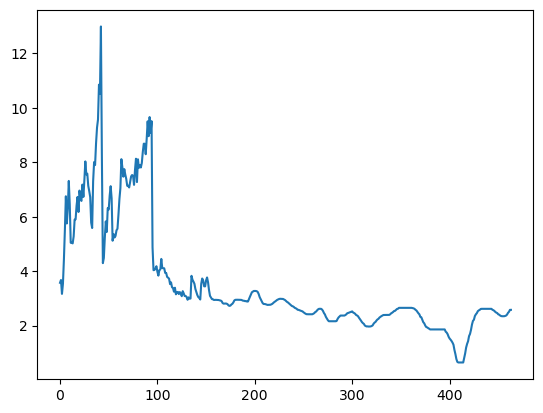

In [ ]:
# df.plot()
dfLog = np.log(df['Valor'])
dfLog.plot()

In [ ]:
msk = (df.index < len(df)-30)
df_train = df[msk].copy()
df_test = df[~msk].copy()


Step: 1 Check for stationarity of time series

Method #1: Time series plot

Method #2: ACF plot and PACF plot